In [2]:
import os.path
import tensorflow as tf
#import helper
import warnings
from distutils.version import LooseVersion
#import project_tests as tests
import time
import numpy as np
import os.path
import tensorflow as tf
import helper
import warnings
from distutils.version import LooseVersion
from keras.models import load_model
import test as tests
import time
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

12764


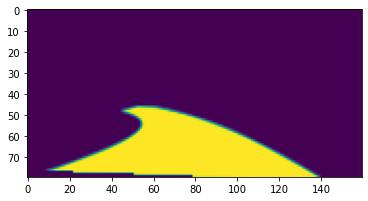

In [3]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pkl = open('full_CNN_labels.p', 'rb')
labels = pickle.load(pkl)
#for im in imgs:

plt.imshow(labels[50].reshape(80,160))
plt.imshow(labels[-1].reshape(80,160))
print(len(labels))
#img =mpimg.imread('full_CNN_labels.p')

12764


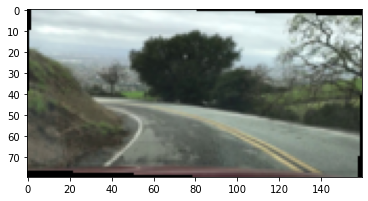

In [4]:
pkl = open('full_CNN_train.p', 'rb')
imgs = pickle.load(pkl)
#for im in imgs:

plt.imshow(imgs[0])
plt.imshow(imgs[50])
plt.imshow(imgs[-1])
print(len(imgs))

In [5]:
pkl = open('coeffs_labels.p', 'rb')
labels = pickle.load(pkl)
for label in labels:
    print(label)

46e+02]
[-2.88976631e-04  5.02461662e-01  1.31392747e+02 -8.11697674e-05
  4.05478993e-01  7.99599451e+02]
[-4.54723806e-04  6.11903733e-01  1.39230651e+02 -3.98356694e-04
  7.16145625e-01  6.99849953e+02]
[-4.45153303e-04  6.10936878e-01  1.39121082e+02 -2.43727597e-04
  5.53872228e-01  7.45158850e+02]
[-4.28837790e-04  6.09261936e-01  1.36061217e+02 -2.99116037e-04
  5.81826069e-01  7.50093768e+02]
[-4.23674441e-04  6.12908962e-01  1.35161953e+02 -3.63205413e-04
  6.11391747e-01  7.59488449e+02]
[-5.04347669e-04  6.89313702e-01  1.28034333e+02 -4.05243177e-04
  6.86086320e-01  7.42537247e+02]
[-5.17788710e-04  7.15590512e-01  1.22766562e+02 -4.31389555e-04
  7.53041994e-01  7.11826445e+02]
[-5.10718375e-04  7.20815837e-01  1.22167906e+02 -2.73609091e-04
  6.67460661e-01  7.10690209e+02]
[-4.49663507e-04  6.80030656e-01  1.25610716e+02 -4.34240504e-04
  7.77706383e-01  6.97674892e+02]
[-3.31155294e-04  5.70148156e-01  1.44776960e+02 -1.48337217e-04
  4.62625491e-01  8.00085234e+02]
[-

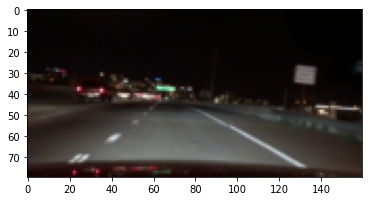

In [6]:
pkl = open('coeffs_train.p', 'rb')
labels = pickle.load(pkl)
plt.imshow(labels[0])

In [7]:
IMAGE_SHAPE = (160, 576)
NUM_CLASSES = 2
#IMAGE_SHAPE = input_shape

model = Sequential()
model.add(BatchNormalization(input_shape=IMAGE_SHAPE))
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))
#model.add(Dense(1, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

ValueError: Input 0 of layer Conv1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 160, 576)

In [ ]:
train_images = pickle.load(open("full_CNN_train.p", "rb" ))
labels = pickle.load(open("full_CNN_labels.p", "rb" ))

train_images = np.array(train_images)
labels = np.array(labels)

labels = labels / 255

train_images, labels = shuffle(train_images, labels)
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2)

batch_size = 128
epochs = 15
input_shape = X_train.shape[1:]

datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)


In [74]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
    epochs=epochs, verbose=1, validation_data=(X_val, y_val))


/Users/adam/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/15
79/79 [==============================] - 24s 298ms/step - loss: 0.0829 - accuracy: 0.8446 - val_loss: 0.0823 - val_accuracy: 0.8451
Epoch 2/15
79/79 [==============================] - 22s 272ms/step - loss: 0.0817 - accuracy: 0.8464 - val_loss: 0.0812 - val_accuracy: 0.8468
Epoch 3/15
79/79 [==============================] - 23s 288ms/step - loss: 0.0808 - accuracy: 0.8480 - val_loss: 0.0804 - val_accuracy: 0.8489
Epoch 4/15
79/79 [==============================] - 23s 285ms/step - loss: 0.0802 - accuracy: 0.8495 - val_loss: 0.0798 - val_accuracy: 0.8498
Epoch 5/15
79/79 [==============================] - 22s 274ms/step - loss: 0.0796 - accuracy: 0.8506 - val_loss: 0.0797 - val

In [63]:
print(history.history.keys())
print(history.history['loss'])
print(history.history['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.13407066464424133, 0.13281305134296417, 0.13229955732822418, 0.1320681869983673]
[0.3257570266723633, 0.2589942514896393, 0.20747187733650208, 0.18580380082130432]


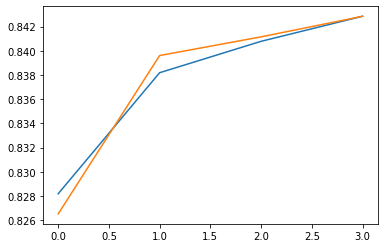

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [79]:
model.evaluate(X_train, y_train)

320/320 [==============================] - 6s 18ms/step - loss: 0.0749 - accuracy: 0.8651


[0.07488731294870377, 0.8650937676429749]

In [ ]:
### Begin sandbox to extact metrics prefit models

In [9]:
# model = load_model('model3.h5')
model = load_model('baseline_cnn.h5')

In [10]:
model.evaluate(X_val, y_val)


80/80 [==============================] - 2s 13ms/step - loss: 0.0786 - accuracy: 0.8532


[0.0786166712641716, 0.8531666398048401]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 80, 160, 3)        12        
_________________________________________________________________
Conv1 (Conv2D)               (None, 78, 158, 8)        224       
_________________________________________________________________
Final (Conv2DTranspose)      (None, 80, 160, 1)        73        
Total params: 309
Trainable params: 303
Non-trainable params: 6
_________________________________________________________________


In [12]:
dict1 = dict()
dict1['loss'] = [0.1544, 0.0279, 0.0165, 0.0130, 0.0113, 0.0100, 0.0093, 0.0088, 0.0084, 0.0080]
dict1['accuracy'] = [0.8367, 0.9404, 0.9527, 0.9554, 0.9566, 0.9572, 0.9576, 0.9578, 0.9578, 0.9581]

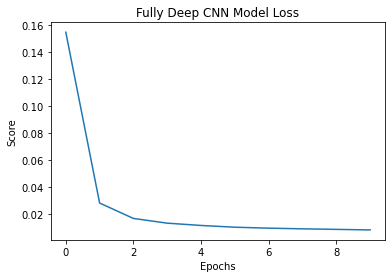

In [13]:
fig, ax = plt.subplots()
ax.plot(dict1['loss'])
ax.set_xlabel("Epochs")
ax.set_ylabel("Score")
ax.set_title('Fully Deep CNN Model Loss')
plt.savefig("FullyDeepCNNModelLoss")

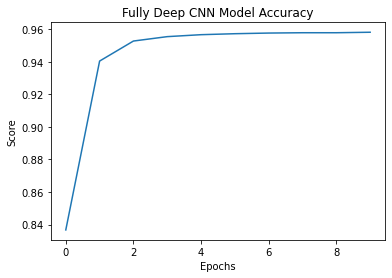

In [14]:
fig, ax = plt.subplots()
ax.plot(dict1['accuracy'])
ax.set_xlabel("Epochs")
ax.set_ylabel("Score")
ax.set_title('Fully Deep CNN Model Accuracy')
plt.savefig("FullyDeepCNNModelAccuracy")

In [15]:
dict2 = dict()
dict2['loss'] = [0.0782, 0.0777, 0.0776, 0.0773, 0.0768, 0.0766, 0.0764, 0.0763, 0.0759, 0.0759, 0.0759]


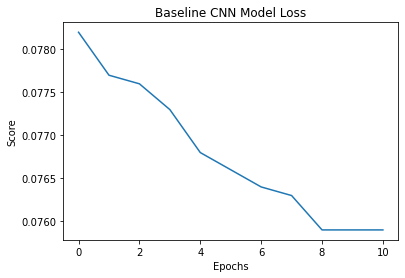

In [18]:
fig, ax = plt.subplots()
ax.plot(dict2['loss'])
ax.set_xlabel("Epochs")
ax.set_ylabel("Score")
ax.set_title('Baseline CNN Model Loss')
plt.savefig("CNN_Baseline")